Импорт библиотеки tensorflow и загрузка изображений из базы MNIST

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

Импорт библиотеки для рисования графиков и изображений

In [2]:
import matplotlib.pyplot as plt

Перевод данных в таблицу тренировочных изображений, их классов (какая это цифра), а также тестовой выборки

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Как устроена таблица изображений для обучения

In [4]:
x_train.shape

(60000, 28, 28)

Это массив из 60000 элементов, каждый из которых это изображение 28 на 28 пикселей.
Давайте его визуализируем

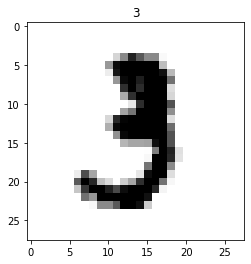

In [5]:
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()

Нам нужна только функция plt.imshow(x_train[1]), но это будет график без подписи, с неудобной тепловой картой, а также с лишним текстовым выводом. Можешь попробовать поубирать лишние строки и посмотреть.
А теперь напишем свою функцию, которая будет визуализировать элемент обучающей выборки.

In [6]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

Проверим, что функция работает

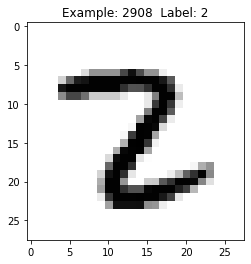

In [7]:
display_digit(2908)

Теперь поясним что за машину мы обучили. Нейронная сеть начинается с формата вводных данных (28х28), а далее идёт один слой сети из 512 элементов с функцией активации relu. Сколько в нём коэффициентов?
После этого мы будем обнулять 20% выходов с 512 нейронов. Добавим 10 нейронов, выход которых будет приведен от действительных чисел к вероятности, в сумме дающей единицу. Что это за 10 вероятностей? Вероятность, что это именно одно из 10 чисел, на которые мы классифицируем.

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Теперь мы готовим сеть к запуску обучения. Связи нейронов это только часть обучения. Нужно выбрать метод поиска правильных коэффициентов, нужно выбрать функцию ошибки (функцию потерь). Также можно указать какую информацию мы хотим получать во время обучения.

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Теперь мы можем запустить обучение на обучающей выборке

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0409 - accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0151 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

Сеть уже обучена. Есть два числа, которые показывают качество обучения: функция потерь (мы её как раз минимизируем) и точность распознавания (наибольшая вероятность отдана верному классу). Но проверять надо на тестовой выборке, где вероятность будет меньше.

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9731
Loss = 0.08611930161714554, accuracy = 0.9731000065803528


In [12]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9811
Loss = 0.06386599689722061, accuracy = 0.9811166524887085


Наконец можно сделать предсказание для массива входжнх изображений. Выберем изображение 0 и его значение. Получим вектор предсказания. Видно, что предсказание идеально совпадает для нулевого элемента.

In [13]:
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

[[1.0277243e-05 6.3948519e-08 2.7593478e-04 9.7551389e-04 4.3098223e-09
  4.2661673e-06 1.0817814e-08 9.9864286e-01 6.9764683e-06 8.4030013e-05]]
7
